<a href="https://colab.research.google.com/github/Juseong-Yu/Gangnam_puplic_data_idea/blob/main/%EA%B0%95%EB%82%A8%EA%B5%AC%EA%B3%B5%EB%AA%A8%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd

In [ ]:
# 지도 데이터 불러오기
EMD = gpd.read_file('/content/BND_ADM_DONG_PG.shp', encoding = "euc-kr")

In [ ]:
EMD.tail()

,BASE_DATE,ADM_NM,ADM_CD,geometry
3523,20230701,운정6동,31200516,"POLYGON ((176367.906 568550.646, 176366.742 56..."
3524,20230701,운정5동,31200515,"POLYGON ((176896.770 570836.185, 176894.169 57..."
3525,20230701,새롬동,29010521,"POLYGON ((223193.497 431749.316, 223183.276 43..."
3526,20230701,도담동,29010514,"POLYGON ((224447.487 434259.018, 224447.454 43..."
3527,20230701,원문동,31110522,"POLYGON ((199267.615 535375.903, 199263.363 53..."


In [ ]:
# 지도 데이터에서 강남 데이터만 추출하기
gangnam = EMD[EMD['ADM_CD'].str.startswith('11230')]
#gangnam.set_crs(epsg=5179,inplace=True)
gangnam.to_crs(epsg=4326,inplace=True)
#gangnam.crs = 'EPSG:5186'
gangnam

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,BASE_DATE,ADM_NM,ADM_CD,geometry
215,20230701,논현2동,11230530,"POLYGON ((127.03472 37.50757, 127.03392 37.507..."
222,20230701,대치1동,11230600,"POLYGON ((127.06084 37.49858, 127.06100 37.498..."
271,20230701,세곡동,11230760,"POLYGON ((127.10374 37.48517, 127.10376 37.485..."
405,20230701,논현1동,11230520,"POLYGON ((127.02451 37.50449, 127.02448 37.504..."
1363,20230701,대치4동,11230630,"POLYGON ((127.05286 37.49631, 127.05286 37.496..."
1610,20230701,신사동,11230510,"POLYGON ((127.02156 37.53553, 127.02424 37.531..."
1611,20230701,삼성1동,11230580,"POLYGON ((127.06757 37.52164, 127.06759 37.520..."
1612,20230701,삼성2동,11230590,"POLYGON ((127.04912 37.50456, 127.04899 37.504..."
1613,20230701,역삼1동,11230640,"POLYGON ((127.03260 37.48971, 127.03230 37.489..."
1614,20230701,역삼2동,11230650,"POLYGON ((127.04675 37.49420, 127.04672 37.494..."


<Axes: >

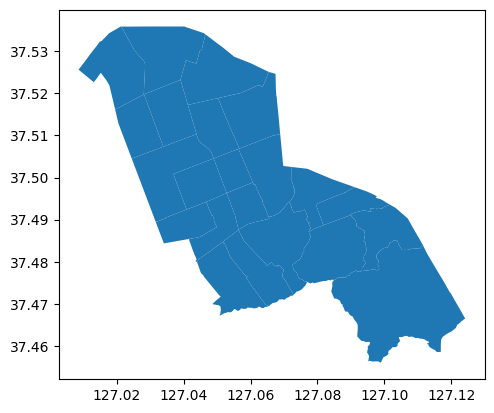

In [ ]:
gangnam.plot()

In [ ]:
# 강남구에서 확인할 지점 만들기
import pandas as pd
lon = [127.0,127.130]
lat = [37.450,37.55]
point = []
for x in range(int(lon[0]*1000), int(lon[1]*1000),2):
  for y in range(int(lat[0]*1000), int(lat[1]*1000),2):
    xy = [x/1000, y/1000]
    point.append(xy)
temp = [[1,2,3,4],[6,7,8,9]]

df = pd.DataFrame(data=point, columns=['경도','위도'])
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['경도'], df['위도']))
df.head()
#df.set_crs(epsg=5186)
#df.to_crs(epsg=5186)
df.crs = 'EPSG:5186'

<Axes: >

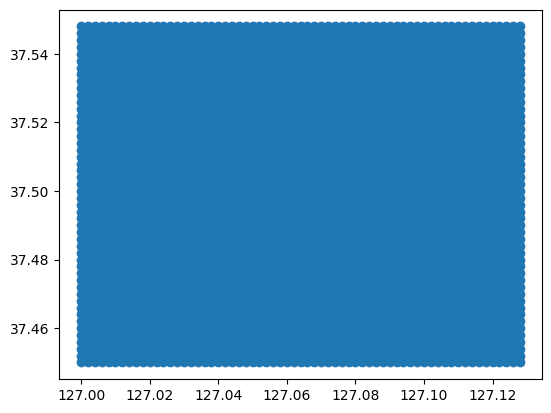

In [ ]:
df.plot()

In [ ]:
df2 = gpd.sjoin(df, gangnam)
df2 = df2[df2['ADM_NM'].str.strip() != '']
df2

<ipython-input-8-8769a797ea24>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:5186
Right CRS: EPSG:4326

  df2 = gpd.sjoin(df, gangnam)


,경도,위도,geometry,index_right,BASE_DATE,ADM_NM,ADM_CD
288,127.010,37.526,POINT (127.010 37.526),1610,20230701,신사동,11230510
337,127.012,37.524,POINT (127.012 37.524),1610,20230701,신사동,11230510
338,127.012,37.526,POINT (127.012 37.526),1610,20230701,신사동,11230510
339,127.012,37.528,POINT (127.012 37.528),1610,20230701,신사동,11230510
387,127.014,37.524,POINT (127.014 37.524),1610,20230701,신사동,11230510
...,...,...,...,...,...,...,...
2717,127.108,37.484,POINT (127.108 37.484),1629,20230701,수서동,11230750
2718,127.108,37.486,POINT (127.108 37.486),1629,20230701,수서동,11230750
2719,127.108,37.488,POINT (127.108 37.488),1629,20230701,수서동,11230750
2767,127.110,37.484,POINT (127.110 37.484),1629,20230701,수서동,11230750


<Axes: >

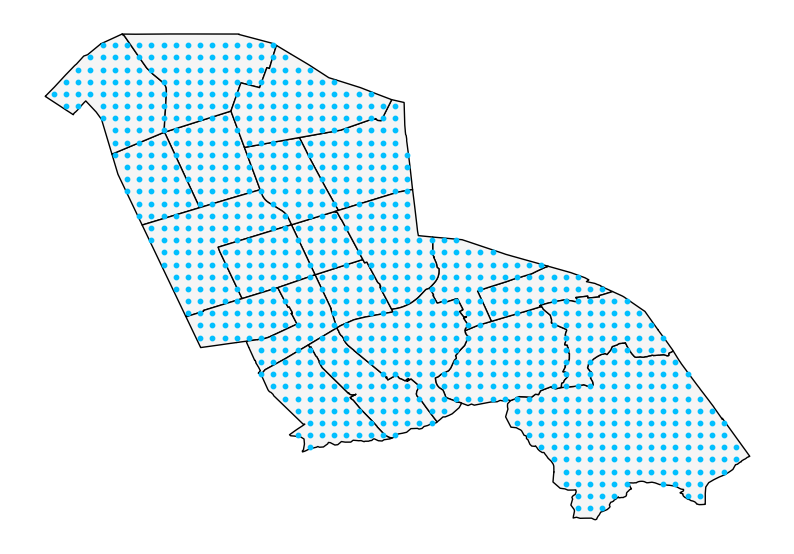

In [ ]:
ax = gangnam.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
df2.plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
!pip install haversine

In [ ]:
# df2 행정동 정리
df2.loc[df2['ADM_NM'] == '삼성1동' , 'ADM_NM'] = '삼성동'
df2.loc[df2['ADM_NM'] == '삼성2동' , 'ADM_NM'] = '삼성동'
df2.loc[df2['ADM_NM'] == '역삼1동' , 'ADM_NM'] = '역삼동'
df2.loc[df2['ADM_NM'] == '역삼2동' , 'ADM_NM'] = '역삼동'
df2.loc[df2['ADM_NM'] == '논현1동' , 'ADM_NM'] = '논현동'
df2.loc[df2['ADM_NM'] == '논현2동' , 'ADM_NM'] = '논현동'
df2.loc[df2['ADM_NM'] == '대치1동' , 'ADM_NM'] = '대치동'
df2.loc[df2['ADM_NM'] == '대치2동' , 'ADM_NM'] = '대치동'
df2.loc[df2['ADM_NM'] == '대치3동' , 'ADM_NM'] = '대치동'
df2.loc[df2['ADM_NM'] == '대치4동' , 'ADM_NM'] = '대치동'
df2.loc[df2['ADM_NM'] == '도곡1동' , 'ADM_NM'] = '도곡동'
df2.loc[df2['ADM_NM'] == '도곡2동' , 'ADM_NM'] = '도곡동'
df2.loc[df2['ADM_NM'] == '개포1동' , 'ADM_NM'] = '개포동'
df2.loc[df2['ADM_NM'] == '개포2동' , 'ADM_NM'] = '개포동'
df2.loc[df2['ADM_NM'] == '개포3동' , 'ADM_NM'] = '개포동'
df2.loc[df2['ADM_NM'] == '개포4동' , 'ADM_NM'] = '개포동'
df2.loc[df2['ADM_NM'] == '일원본동' , 'ADM_NM'] = '일원동'
df2.loc[df2['ADM_NM'] == '일원1동' , 'ADM_NM'] = '일원동'

In [ ]:
# 위도 경도로 검사할 점과 주차장 과의 거리를 구하기
from haversine import haversine
parkingLot = pd.read_csv('/content/주차장.csv')
df2['length'] = ''
df2['nearby'] = ''
import math
for idx1, ser1 in df2.iterrows():
  minLength = 1000000000
  near = 0
  for idx2, ser2 in parkingLot.iterrows():
    length = haversine((ser1.위도,ser1.경도), (ser2.위도, ser2.경도), unit = "m")
    if length < minLength:
      minLength = length
    if length <= 1000:
      near += 1
  df2.at[idx1,'length'] = minLength
  df2.at[idx1,'nearby'] = near


In [ ]:
maxlength = df2['length'].max()
minlength = 1.0
df2['lengthscore'] = ''
df2['nearbyscore'] =  ''

for id , ser in df2.iterrows():
  x = df2.loc[id,'length']
  df2.at[id, 'lengthscore'] = ((x - minlength) / (maxlength - minlength)) * 10
  if ser.nearby >= 1 and ser.nearby <= 2:
    df2.at[id, 'nearbyscore'] = 7
  elif ser.nearby >= 3 and ser.nearby <= 5:
    df2.at[id, 'nearbyscore'] = 5
  elif ser.nearby >= 6 and ser.nearby <= 9:
    df2.at[id, 'nearbyscore'] = 3
  elif ser.nearby >= 10:
    df2.at[id, 'nearbyscore'] = 0
  else:
    df2.at[id, 'nearbyscore'] = 10

In [ ]:
# 주정차 단속 위반 차량대수(면적대비)
illegal = pd.read_excel('/content/파이썬용위반단속.xlsx')
df2 = pd.merge(df2, illegal, on='ADM_NM', how='left')
df2['illegalscore'] =  ''
maxillegal = df2['illegal'].max()
minillegal = df2['illegal'].min()
for id, ser in df2.iterrows():
  x = df2.loc[id,'illegal']
  df2.at[id, 'illegalscore'] = ((x - minillegal) / (maxillegal - minillegal)) * 10

In [ ]:
#유동인구(면적대비)
people = pd.read_excel('/content/파이썬용_유동인구.xlsx')
df2 = pd.merge(df2, people, on = 'ADM_NM', how = 'left')
df2['peoplescore'] = ''
df2['homescore'] = ''
df2['workscore'] = ''
maxpeople = df2['평균길단위'].max()
minpeople = df2['평균길단위'].min()
maxhome = df2['평균주거'].max()
minhome = df2['평균주거'].min()
maxwork = df2['평균직장'].max()
minwork = df2['평균직장'].min()
for id, ser in df2.iterrows():
  x = df2.loc[id,'평균길단위']
  df2.at[id, 'peoplescore'] = ((x - minpeople) / (maxpeople - minpeople)) * 10
  x = df2.loc[id,'평균주거']
  df2.at[id, 'homescore'] = ((x - minhome) / (maxhome - minhome)) * 10
  x = df2.loc[id,'평균직장']
  df2.at[id, 'workscore'] = ((x - minwork) / (maxwork - minwork)) * 10

In [ ]:
store = pd.read_excel('/content/파이썬용_가게.xlsx')
df2 = pd.merge(df2, store, on='ADM_NM', how='left')
df2['storescore'] =  ''
maxstore = df2['store'].max()
minstore = df2['store'].min()
for id, ser in df2.iterrows():
  x = df2.loc[id,'store']
  df2.at[id, 'storescore'] = ((x - minstore) / (maxstore - minstore)) * 10

In [ ]:
# 모든 점수들을 합친 최종점수를 만들어 한 열로 표현
df2['score'] = ''
for id, ser in df2.iterrows():
  df2.at[id,'score'] = df2.loc[id,'illegalscore'] + df2.loc[id,'peoplescore'] + df2.loc[id,'homescore']
  + df2.loc[id,'workscore'] + df2.loc[id,'storescore']+ df2.loc[id,'lengthscore'] + df2.loc[id,'nearbyscore']

In [ ]:
df2

,경도,위도,geometry,index_right,BASE_DATE,ADM_NM,ADM_CD,length,nearby,lengthscore,...,illegalscore,평균길단위,평균주거,평균직장,peoplescore,homescore,workscore,store,storescore,score
0,127.010,37.526,POINT (127.010 37.526),1610,20230701,신사동,11230510,1268.362676,0,6.489243,...,8.964113,34311.667,88,136,1.237609,0.290621,0.574861,2216.5785,5.054397,10.492343
1,127.012,37.524,POINT (127.012 37.524),1610,20230701,신사동,11230510,1059.979569,0,5.422265,...,8.964113,34311.667,88,136,1.237609,0.290621,0.574861,2216.5785,5.054397,10.492343
2,127.012,37.526,POINT (127.012 37.526),1610,20230701,신사동,11230510,1097.529738,0,5.614532,...,8.964113,34311.667,88,136,1.237609,0.290621,0.574861,2216.5785,5.054397,10.492343
3,127.012,37.528,POINT (127.012 37.528),1610,20230701,신사동,11230510,1176.648262,0,6.01964,...,8.964113,34311.667,88,136,1.237609,0.290621,0.574861,2216.5785,5.054397,10.492343
4,127.014,37.524,POINT (127.014 37.524),1610,20230701,신사동,11230510,884.076864,1,4.521595,...,8.964113,34311.667,88,136,1.237609,0.290621,0.574861,2216.5785,5.054397,10.492343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,127.108,37.484,POINT (127.108 37.484),1629,20230701,수서동,11230750,1788.055887,0,9.150214,...,1.938276,13708.667,99,111,0.351446,0.435931,0.46761,630.5361,1.068643,2.725653
998,127.108,37.486,POINT (127.108 37.486),1629,20230701,수서동,11230750,1954.020829,0,10.0,...,1.938276,13708.667,99,111,0.351446,0.435931,0.46761,630.5361,1.068643,2.725653
999,127.108,37.488,POINT (127.108 37.488),1629,20230701,수서동,11230750,1874.586436,0,9.593274,...,1.938276,13708.667,99,111,0.351446,0.435931,0.46761,630.5361,1.068643,2.725653
1000,127.110,37.484,POINT (127.110 37.484),1629,20230701,수서동,11230750,1702.037065,0,8.709774,...,1.938276,13708.667,99,111,0.351446,0.435931,0.46761,630.5361,1.068643,2.725653


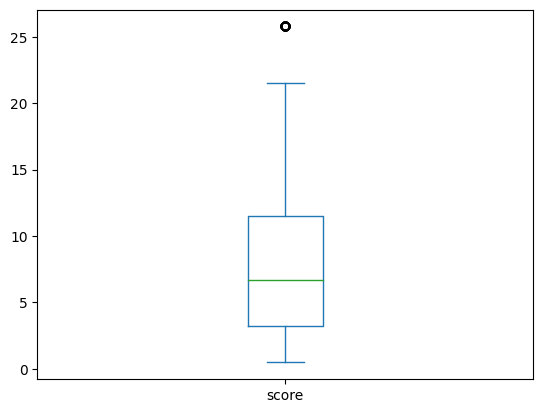

In [ ]:
# boxplot(아무 열이나 넣어서 확인 가능)
boxplot = df2['score'].plot.box()

<Axes: >

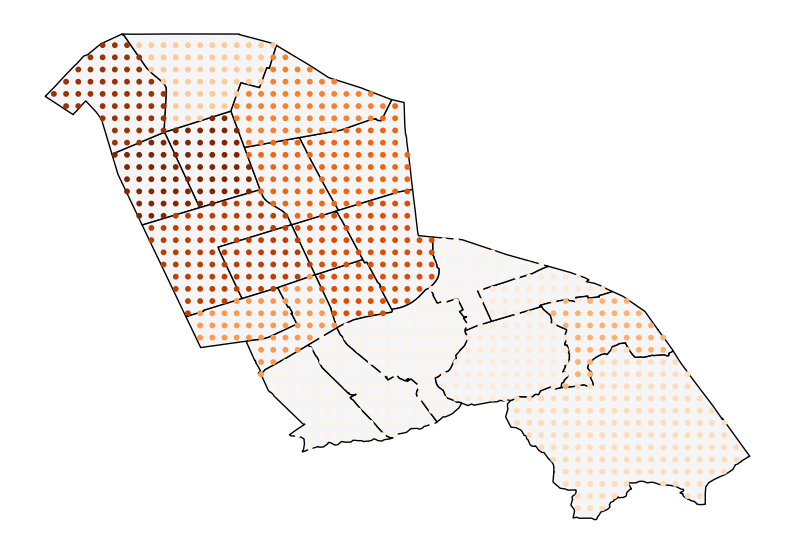

In [ ]:
ax = gangnam.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
df2.plot(ax=ax, column='illegalscore',cmap='Oranges', markersize=10)